# Lab 2 Newton's Method
In this lab, you will create a demo for Newton’s method graphically. Specifically, you need to create a video of how Newton’s method progresses with iterations. You can see an example at Example_2.avi file.



**Copy your Colab link here:**

https://colab.research.google.com/drive/1u-KYsNXYDvX2RmHUV8L4fYCXPik1ksrP?usp=sharing

Import package here

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Step 0. Moving the lab to your folder**

Duplicate this notebook (as you won't have write permission to this) to your Google Drive.
This can be done by clicking on *File Menu - Save a copy in Drive*

Run to mount your google drives:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Your drive would be accessed as '/content/drive/MyDrive' for Colab. You may need to put your data and creating a 'results' folder somewhere in the drive. The 'results' folder could be used for storing the required outputs.   

In [ ]:
# example goes like:
DataPath  = '/content/drive/MyDrive/YOUR_PATH_HERE'
ResultPath = '/content/drive/MyDrive/YOUR_PATH_HERE/results'

**Step 1: Write the function *my_poly* and *my_poly_derivative***

The polynomial function is given by

\begin{equation}
f(x)=x^2+5 x-4
\end{equation}

The polynomial and its derivative should be hardcoded in the function *my_poly* and *my_poly_derivative*.


In [ ]:
def my_poly(x):
  """
    Argument Descriptions
    Required Input Arguments:
        x: Value in the function domain.

    Required Output Arguments:
        fx: Value of the function at any value x.
    """

  fx = x**4 + 2*x**3 - 1






  return fx

In [ ]:
def my_poly_derivative(x):
  """
    Argument Descriptions
    Required Input Arguments:
        x: Value at where the function can be derivable.

    Required Output Arguments:
        fder: Value of the first derivation of the function at any value x.
    """




  dfx = 4*x**3 + 6*x**2



  return dfx

**Step 2: Write the updated function *newtons_update*** based on lecture slides



In [ ]:
def newtons_update_min(x_k):

  """
    Argument Descriptions
    Required Input Arguments:
        x_k: Initial value of x in the current iterative step.

    Required Output Arguments:
        x_kPlus1: Updated value of x in the current iterative step.
  """

  dfx_k = my_poly_derivative(x_k)

  ddfx_k = my_poly_second_derivative(x_k)



  x_kPlus1 = x_k - (dfx_k/ddfx_k)

  return x_kPlus1

**Step 3: Experiment with different values of xi and Plot**




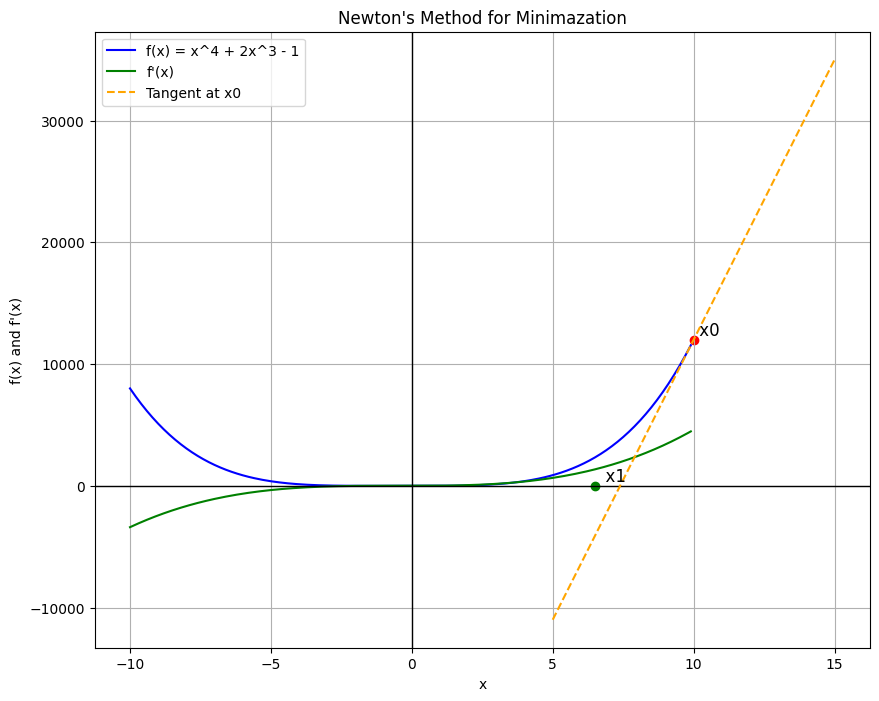

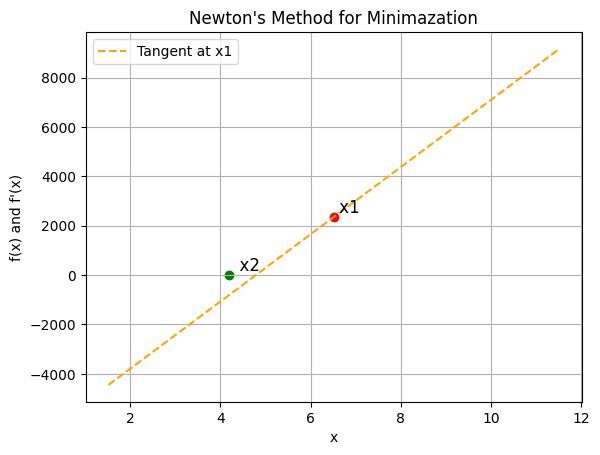

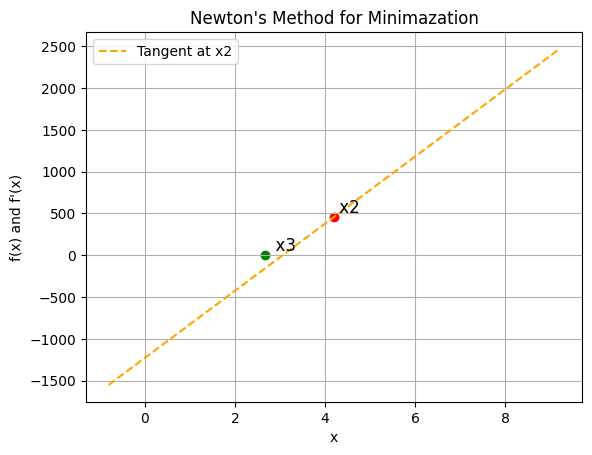

In [ ]:
xi = 10.0

maxIters =  100
tol = 1e-06


xlim_values= np.arange(-abs(xi), abs(xi), 0.1)

# Initialization of relative errors, rel_errs
#rel_errs = np.zeros((maxIters,1))

# caluculate function values for each value of xlim_values using for loop
f_values= []
f_prime_values =[]

#xlim_values = np.arange(-abs(xi), abs(xi), 0.1)
#ylim_values = None

for x in xlim_values:
  f_values.append(my_poly(x))
  f_prime_values.append(my_poly_derivative(x))

  #plot the function values
plt.figure(figsize=(10, 8))
plt.plot(xlim_values, f_values, label='f(x) = x^4 + 2x^3 - 1', color= 'blue')
plt.plot(xlim_values, f_prime_values, label="f'(x)", color= 'green')



# Draw X and y axis
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

xr = xi
for iter in range(3):
  fxi = my_poly(xr)
  dfxi = my_poly_derivative(xr)

  #plot the current point
  plt.scatter(xr,fxi, color='red') # point mark
  plt.text(xr,fxi, f' x{iter}', fontsize=12, verticalalignment='bottom')

  x_tangent = np.linspace(xr - 5, xr + 5, 100)
  y_tangent = fxi + dfxi * (x_tangent-xr)
  plt.plot(x_tangent, y_tangent, linestyle='--', color='orange', label=f"Tangent at x{iter}")

  xr_new = newtons_update_min(xr)

  plt.scatter(xr_new, 0, color='green')
  plt.text(xr_new, 0, f'  x{iter + 1}', fontsize= 12, verticalalignment='bottom')

  xr = xr_new

  plt.title('Newton\'s Method for Minimazation')
  plt.xlabel('x')
  plt.ylabel('f(x) and f\'(x)')
  plt.legend()
  plt.grid(True)
  plt.show()



**Step 4: Create a demo for Newton’s method graphically**

You need to create a video of how Newton’s method progresses with iterations, i.e., by repeating the previous steps to generate each frame and save as a video.

You may need to use the following package to create a gif picture as demo. Feel free to use your own one.

In [ ]:
! pip install imageio
import imageio

In [74]:
# use for loop to generate each frame and create your demo

  # Relative error from xr and xrold and stopping criteria and break if rel_err<tol.
  # write from here

  # Define the polynomial function and its derivative

def my_poly (x):
       return x**4 + 2*x**3 - 1

def my_poly_derivative(x):
      return 4*x**3+6*x**2

def newtons_update_min(x):
     fx = my_poly(x)
     dfx = my_poly_derivative(x)
     d2fx = 12*x**2 + 12*x
     return x - dfx / d2fx

     # Define the polynomial function and its derivative

# Set up parameters
xi = 10.0
maxIters = 17
tol = 1e-6
frames = []

import os
# Create directory for temporary images
os.makedirs ('frames', exist_ok=True) # removed the extra indent

# Initialize xr (the current point )

xr = xi
# For loop to generate each frame and create the demo

for iter in range(maxIters):
    xrold = xr

    # Find Newton's update
    xr = newtons_update_min(xrold)

    rel_err = abs((xr - xrold) / xr)
    # Stop if relative error is below the tolerance
    if rel_err < tol:
        break
    # Initialize figure
    plt.figure(figsize=(10, 8))
    # Calculate function values for plotting:
    xlim_values = np.arange(-abs(xi), abs(xi), 0.1)
    f_values = [my_poly(x) for x in xlim_values]
    f_prime_values = [my_poly_derivative(x) for x in xlim_values]

    # Plot the function values and its derivative
    plt.plot(xlim_values, f_values, label='f(x)', color='blue')

    plt.plot(xlim_values, f_prime_values, label="f' (x)", color= 'green')


    # Calculate function values for plotting
    xlim_values = np.arange(-abs(xi), abs(xi), 0.1)
    f_values = [my_poly(x) for x in xlim_values]
    f_prime_values = [my_poly_derivative(x) for x in xlim_values]

    # Plot the function values and its derivative
    plt.plot(xlim_values, f_values, label='f(x)', color='blue')
    plt.plot(xlim_values, f_prime_values, label="f'(x)", color= 'green')

    # Draw X-axis and y-axis centered at origin
    plt.axhline(0, color='black', linewidth=1)
    plt. axvline(0, color='black', linewidth=1)



    fxi = my_poly(xr) # replaced - with =
    dfxi = my_poly_derivative(xr) # replaced - with =

    plt.scatter(xr, fxi, color='red')  # Mark the current point
    plt.text(xr, fxi, f' x{iter}', fontsize=12, verticalalignment='bottom')

    # Plot the tangent line at xr
    x_tangent = np.linspace(xr-5, xr+5,100)
    y_tangent = fxi + dfxi * (x_tangent - xr)
    plt.plot(x_tangent, y_tangent, linestyle='--', color='orange', label=f"Tangent at x{iter}")



    # Plot dotted line from current point to x-axis
    plt. plot([xr, xr], [0, fxi], linestyle= ':', color='red', label='Vertical Line to x-axis')
    # Draw point for the new update
    plt.scatter(xr, 0, color= 'green')

    plt.text(xr, 0, f' x{iter + 1}', fontsize=12, verticalalignment='bottom')
    # Mark the new root estimate

    # Set x-axis and y-axis labels
    plt.xticks(np.arange(np.floor(xlim_values.min()), np.ceil(xlim_values.max()) + 5, 5))
    plt.yticks(np.arange(np.floor(min(f_values)), np. ceil(max(f_values)) + 2000, 2000))

    # Final plot formatting
    plt. title(f'Newton\'s Method Iteration {iter + 1}')
    plt.xlabel('x')
    plt. ylabel('f(x) and F\' (x)')
    plt. legend()
    plt. grid (True)
    # Save each frame as an image
    filename = f'frames/frame_{iter:03d}•png.png'
    plt. savefig(filename)
    frames. append (filename)

    plt.close()

with imageio.get_writer('newtons_method_demo_slow.gif', mode= 'I', duration=500.0) as writer:
         for frame in frames:
            image = imageio.imread(frame) # changed frames to frame
            writer.append_data(image)

       # Clean up frames directory
         for frame in frames:
            os.remove(frame)

       # Optionally, remove the directory if it's empty
         if not os.listdir('frames'):
            os.rmdir('frames')

         print ("GIF created: newtons method demo_ slow.gif")









<ipython-input-74-b412b96c63d4>:115: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame) # changed frames to frame


GIF created: newtons method demo_ slow.gif


**You are ready to submit in Canvas!**

4 easy steps to submit your lab:

1.   Go to "File" - Download both ".ipynb" and ".py"
2.   Click on "Share" option on top right - Click on "copy link" option. Make sure your permission is set to "Anyone on the internet with this link can view"
3.   Upload the ".ipynb" file obtained from Step (1) with your 'results' folder to Canvas. If it is too big, zip it before uploading.
4.   In the text comments on Canvas, paste the link obtained from Step (3).

That's it!

In short, we want to have one link, one .ipynb and one 'Lab2_yourJHID.zip' containing all the required outputs.

Please suffix your colab file and the zip file with your _jhID, eg: Lab2_myjhID12
